In [2]:
#importing the libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import re
import vgg
import torch

In [3]:
#loading the pretrained VGG-19 model
model = vgg.VGG19()
model.load_weights('vgg_normalized.pth')

In [4]:
#defining the classes
Dict = {'cloudy':0,'rain':1,'shine':2,'sunrise':3}

In [5]:
#creating the training dataloader by using Gram matrix to extract features
Gram_total_training=[]
labels_training = []
count = 0
for i in os.listdir("HW7-Auxilliary/data/training/"):
    print(i)
    image = cv2.imread(os.path.join("HW7-Auxilliary/data/training/",i))
    simage = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    features = model(simage/simage.max())
    rfeatures = features.reshape(512,-1)
    Gram = rfeatures@rfeatures.T
    Gram_total_training.append(Gram.flatten())
    name = re.split('(\d+)',i)[0]
    labels_training.append(Dict[name])

cloudy1.jpg
cloudy10.jpg
cloudy100.jpg
cloudy101.jpg
cloudy102.jpg
cloudy103.jpg
cloudy104.jpg
cloudy105.jpg
cloudy106.jpg
cloudy107.jpg
cloudy108.jpg
cloudy109.jpg
cloudy11.jpg
cloudy110.jpg
cloudy111.jpg
cloudy112.jpg
cloudy113.jpg
cloudy114.jpg
cloudy115.jpg
cloudy116.jpg
cloudy117.jpg
cloudy118.jpg
cloudy119.jpg
cloudy12.jpg
cloudy120.jpg
cloudy121.jpg
cloudy122.jpg
cloudy123.jpg
cloudy124.jpg
cloudy125.jpg
cloudy126.jpg
cloudy127.jpg
cloudy128.jpg
cloudy129.jpg
cloudy13.jpg
cloudy130.jpg
cloudy131.jpg
cloudy132.jpg
cloudy133.jpg
cloudy134.jpg
cloudy135.jpg
cloudy136.jpg
cloudy137.jpg
cloudy138.jpg
cloudy139.jpg
cloudy14.jpg
cloudy140.jpg
cloudy141.jpg
cloudy142.jpg
cloudy143.jpg
cloudy144.jpg
cloudy145.jpg
cloudy146.jpg
cloudy147.jpg
cloudy148.jpg
cloudy149.jpg
cloudy15.jpg
cloudy150.jpg
cloudy151.jpg
cloudy152.jpg
cloudy153.jpg
cloudy154.jpg
cloudy155.jpg
cloudy156.jpg
cloudy157.jpg
cloudy158.jpg
cloudy159.jpg
cloudy16.jpg
cloudy160.jpg
cloudy161.jpg
cloudy162.jpg
cloudy163.jpg
c

sunrise125.jpg
sunrise126.jpg
sunrise127.jpg
sunrise128.jpg
sunrise129.jpg
sunrise13.jpg
sunrise130.jpg
sunrise131.jpg
sunrise132.jpg
sunrise133.jpg
sunrise134.jpg
sunrise135.jpg
sunrise136.jpg
sunrise137.jpg
sunrise138.jpg
sunrise139.jpg
sunrise14.jpg
sunrise140.jpg
sunrise141.jpg
sunrise142.jpg
sunrise143.jpg
sunrise144.jpg
sunrise145.jpg
sunrise146.jpg
sunrise147.jpg
sunrise148.jpg
sunrise149.jpg
sunrise15.jpg
sunrise150.jpg
sunrise151.jpg
sunrise152.jpg
sunrise153.jpg
sunrise154.jpg
sunrise155.jpg
sunrise156.jpg
sunrise157.jpg
sunrise158.jpg
sunrise159.jpg
sunrise16.jpg
sunrise160.jpg
sunrise161.jpg
sunrise162.jpg
sunrise163.jpg
sunrise164.jpg
sunrise165.jpg
sunrise166.jpg
sunrise167.jpg
sunrise168.jpg
sunrise169.jpg
sunrise17.jpg
sunrise170.jpg
sunrise171.jpg
sunrise172.jpg
sunrise173.jpg
sunrise174.jpg
sunrise175.jpg
sunrise176.jpg
sunrise177.jpg
sunrise178.jpg
sunrise179.jpg
sunrise18.jpg
sunrise180.jpg
sunrise181.jpg
sunrise182.jpg
sunrise183.jpg
sunrise184.jpg
sunrise185.jpg
s

In [6]:
#creating the testing dataloader by using Gram matrix to extract features
Gram_total_testing=[]
labels_testing = []
for i in os.listdir("HW7-Auxilliary/data/testing/"):
    print(i)
    image = cv2.imread(os.path.join("HW7-Auxilliary/data/testing/",i))
    simage = cv2.resize(image, dsize=(256,256), interpolation=cv2.INTER_CUBIC)
    features = model(simage/simage.max())
    rfeatures = features.reshape(512,-1)
    Gram = rfeatures@rfeatures.T
    Gram_total_testing.append(Gram.flatten())
    name = re.split('(\d+)',i)[0]
    labels_testing.append(Dict[name])

cloudy251.jpg
cloudy252.jpg
cloudy253.jpg
cloudy254.jpg
cloudy255.jpg
cloudy256.jpg
cloudy257.jpg
cloudy258.jpg
cloudy259.jpg
cloudy260.jpg
cloudy261.jpg
cloudy262.jpg
cloudy263.jpg
cloudy264.jpg
cloudy265.jpg
cloudy266.jpg
cloudy267.jpg
cloudy268.jpg
cloudy269.jpg
cloudy270.jpg
cloudy271.jpg
cloudy272.jpg
cloudy273.jpg
cloudy274.jpg
cloudy275.jpg
cloudy276.jpg
cloudy277.jpg
cloudy278.jpg
cloudy279.jpg
cloudy280.jpg
cloudy281.jpg
cloudy282.jpg
cloudy283.jpg
cloudy284.jpg
cloudy285.jpg
cloudy286.jpg
cloudy287.jpg
cloudy288.jpg
cloudy289.jpg
cloudy290.jpg
cloudy291.jpg
cloudy292.jpg
cloudy293.jpg
cloudy294.jpg
cloudy295.jpg
cloudy296.jpg
cloudy297.jpg
cloudy298.jpg
cloudy299.jpg
cloudy300.jpg
rain166.jpg
rain167.jpg
rain168.jpg
rain169.jpg
rain170.jpg
rain171.jpg
rain172.jpg
rain173.jpg
rain174.jpg
rain175.jpg
rain176.jpg
rain177.jpg
rain178.jpg
rain179.jpg
rain180.jpg
rain181.jpg
rain182.jpg
rain183.jpg
rain184.jpg
rain185.jpg
rain186.jpg
rain187.jpg
rain188.jpg
rain189.jpg
rain190.jpg


In [7]:
#Selecting the random 1024 features
random_features = np.random.randint(0,512*512,1024)


In [8]:
f_train = np.asarray(Gram_total_training)
f_train = f_train.astype('float32')
f_training = np.matrix(f_train[:,random_features])

In [9]:
l_train = np.asarray(labels_training)
l_training = l_train.astype('int32') 

In [10]:
#Defining the model
#Using OpenCV implementation
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 700, 1e-7))

In [11]:
#Training the model
svm.train(f_training, cv2.ml.ROW_SAMPLE, l_training)

True

In [12]:
f_test = np.asarray(Gram_total_testing)
f_test = f_test.astype('float32')
f_testing = np.matrix(f_test[:,random_features])

In [13]:
l_test = np.asarray(labels_testing)
l_testing = l_test.astype('int32') 

In [14]:
#evaluating the trained model on the test dataset
count = np.zeros((4,4));
for i in range(len(labels_testing)):
    l_pred = svm.predict(f_testing[i])[1]
    count[labels_testing[i],int(l_pred)] = count[labels_testing[i],int(l_pred)]+1
    


In [14]:
count

array([[47.,  0.,  3.,  0.],
       [ 0., 50.,  0.,  0.],
       [ 2.,  1., 46.,  1.],
       [ 0.,  0.,  0., 50.]])

In [15]:
#total classification accuracy
np.trace(count)/np.sum(count) *100

96.5

<AxesSubplot:>

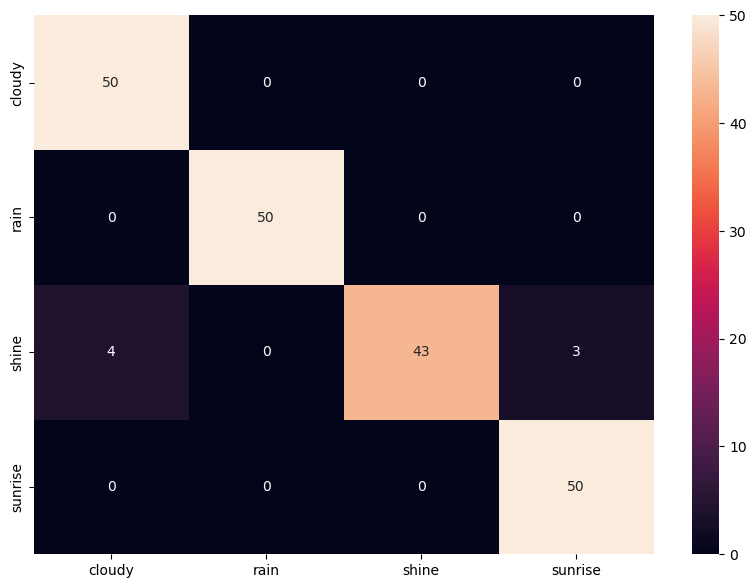

In [17]:
#Plotting the confusion matrix
import seaborn as sn
import pandas as pd
heat = pd.DataFrame(count, index = [i for i in ["cloudy","rain","shine","sunrise"]],
                  columns = [i for i in ["cloudy","rain","shine","sunrise"]])
plt.figure(figsize = (10,7))
sn.heatmap(heat, annot=True)

0


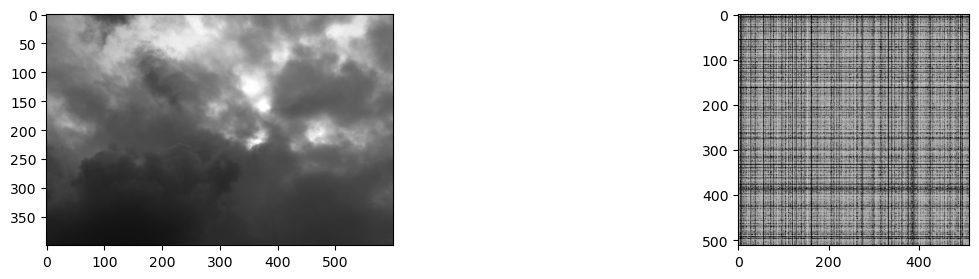

In [18]:
#Plotting the Gram matrix for the image of a cloud
image1 = cv2.imread(os.path.join("HW7-Auxilliary/data/training/",os.listdir("HW7-Auxilliary/data/training/")[0]))
rimage1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(rimage1)
ax2.imshow(np.log(abs(Gram_total_training[0].reshape((512,512)))+0.00001),cmap='gray')
plt.savefig("cloud.jpg")
print(labels_training[0])

1


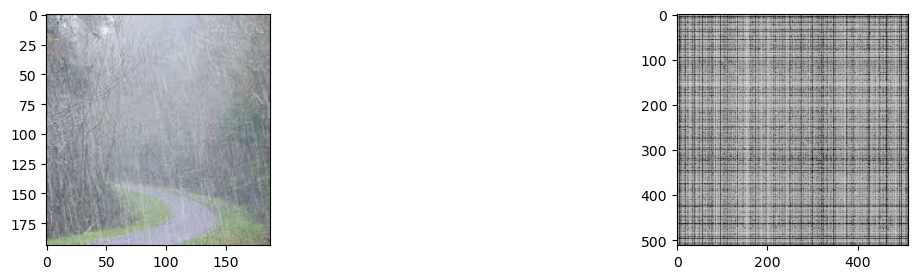

In [19]:
#Plotting the Gram matrix for the image of rain
image1 = cv2.imread(os.path.join("HW7-Auxilliary/data/training/",os.listdir("HW7-Auxilliary/data/training/")[300]))
rimage1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(rimage1)
ax2.imshow(np.log(abs(Gram_total_training[300].reshape((512,512)))+0.00001),cmap='gray')
plt.savefig("rain.jpg")
print(labels_training[300])

2


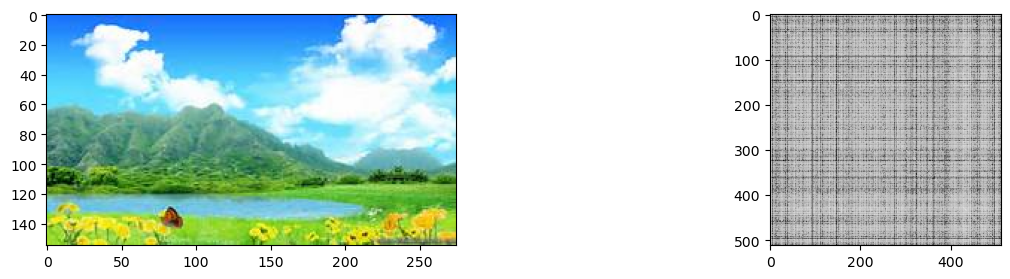

In [20]:
#Plotting the Gram matrix for the image of shine
image1 = cv2.imread(os.path.join("HW7-Auxilliary/data/training/",os.listdir("HW7-Auxilliary/data/training/")[500]))
rimage1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(rimage1)
ax2.imshow(np.log(abs(Gram_total_training[500].reshape((512,512)))+0.00001),cmap='gray')
plt.savefig("shine.jpg")
print(labels_training[500])

3


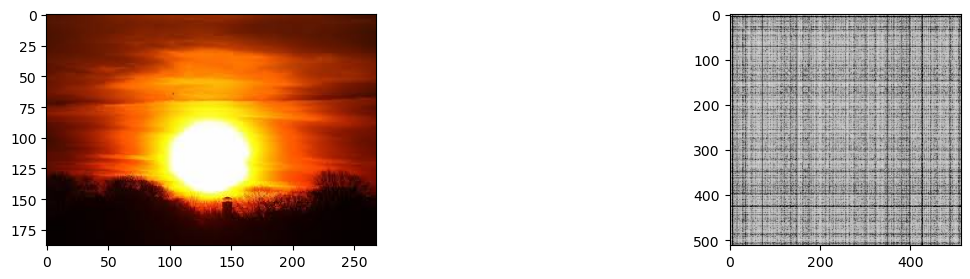

In [21]:
#Plotting the Gram matrix for the image of sunrise
image1 = cv2.imread(os.path.join("HW7-Auxilliary/data/training/",os.listdir("HW7-Auxilliary/data/training/")[900]))
rimage1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(rimage1)
ax2.imshow(np.log(abs(Gram_total_training[900].reshape((512,512)))+0.00001),cmap='gray')
plt.savefig("sunrise.jpg")
print(labels_training[900])

In [22]:
#Saving the features used for training
np.savez_compressed("training_Gram",f=f_training,l =l_training)

In [23]:
#Saving the features used for training
np.savez_compressed("testing_Gram",f=f_testing,l =l_testing)